In [1]:
from google.colab import drive
import zipfile
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define the paths
zip_file_path = '/content/drive/My Drive/archive (8).zip'  # Adjust the path to your file location
destination_folder = '/content/Animals_dataset'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)

print(f"Extracted files to: {destination_folder}")


Mounted at /content/drive
Extracted files to: /content/Animals_dataset


In [2]:
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, transforms
import torch.optim as optim
from torch.utils.data import DataLoader
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import os


In [3]:
train_transform=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])
test_transform=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])

])
valid_transform=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.496],[0.229,0.224,0.225])
])

In [4]:

train_dir='/content/Animals_dataset/train-cat-rabbit'
test_dir='/content/Animals_dataset/test-images'
valid_dir='/content/Animals_dataset/val-cat-rabbit'

In [5]:
train_dataset=datasets.ImageFolder(root=train_dir,transform=train_transform)
test_dataset=datasets.ImageFolder(root=test_dir,transform=test_transform)
valid_dataset=datasets.ImageFolder(root=valid_dir,transform=valid_transform)

In [6]:
train_loader=DataLoader(dataset=train_dataset,batch_size=32,shuffle=True)
test_loader=DataLoader(dataset=test_dataset,batch_size=32,shuffle=True)
valid_loader=DataLoader(dataset=valid_dataset,batch_size=32,shuffle=True)


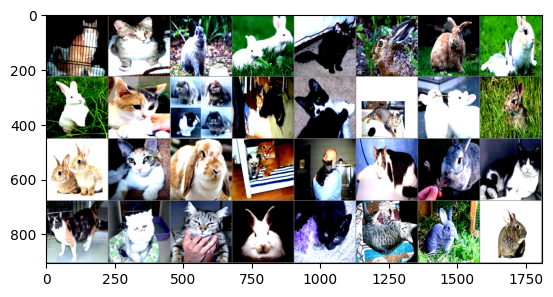

cat   cat   rabbit rabbit cat   rabbit rabbit rabbit rabbit cat   rabbit cat   cat   cat   rabbit rabbit rabbit cat   rabbit cat   cat   cat   rabbit cat   cat   cat   cat   rabbit cat   cat   rabbit rabbit


In [8]:
def imshow(img):
  img=img/2+0.5
  npimg=img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()


dataiter=iter(train_loader)
images,labels=next(dataiter)
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{train_dataset.classes[labels[j]]:5}' for j in range(32)))

In [9]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [10]:
class CustomCNN(nn.Module):
  def __init__(self):
    super(CustomCNN,self).__init__()
    self.conv1=nn.Conv2d(3,32,kernel_size=3,padding=1)
    self.conv2=nn.Conv2d(32,64,kernel_size=3,padding=1)
    self.conv3=nn.Conv2d(64,128,kernel_size=3,padding=1)
    self.pool=nn.MaxPool2d(2,2)
    self.fc1=nn.Linear(128*28*28,512)
    self.fc2=nn.Linear(512,256)
    self.fc3=nn.Linear(256,2)

  def forward(self,x):
    x=self.pool(F.relu(self.conv1(x)))
    x=self.pool(F.relu(self.conv2(x)))
    x=self.pool(F.relu(self.conv3(x)))
    x=x.view(-1,128*28*28)
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.fc3(x)
    return x

model=CustomCNN().to(device)



In [11]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)

In [15]:
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    total = 0
    correct = 0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100 * correct / total
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_acc:.2f}%')

    model.eval()
    val_running_loss = 0.0
    val_total = 0
    val_correct = 0

    with torch.no_grad():
        for images, labels in valid_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            _, predicted = torch.max(outputs, 1)

            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
            val_running_loss += loss.item()
    val_epoch_loss = val_running_loss / len(valid_loader)
    val_epoch_acc = 100 * val_correct / val_total
    print(f'Epoch [{epoch+1}/{num_epochs}], Validation Loss: {val_epoch_loss:.4f}, Validation Accuracy: {val_epoch_acc:.2f}%')



Epoch [1/10], Train Loss: 0.0000, Train Accuracy: 100.00%
Epoch [1/10], Validation Loss: 1.9662, Validation Accuracy: 82.13%
Epoch [2/10], Train Loss: 0.0000, Train Accuracy: 100.00%
Epoch [2/10], Validation Loss: 1.9996, Validation Accuracy: 82.37%
Epoch [3/10], Train Loss: 0.0000, Train Accuracy: 100.00%
Epoch [3/10], Validation Loss: 2.0627, Validation Accuracy: 82.13%
Epoch [4/10], Train Loss: 0.0000, Train Accuracy: 100.00%
Epoch [4/10], Validation Loss: 2.0908, Validation Accuracy: 82.13%
Epoch [5/10], Train Loss: 0.0000, Train Accuracy: 100.00%
Epoch [5/10], Validation Loss: 2.0976, Validation Accuracy: 82.37%
Epoch [6/10], Train Loss: 0.0000, Train Accuracy: 100.00%
Epoch [6/10], Validation Loss: 2.1169, Validation Accuracy: 82.13%
Epoch [7/10], Train Loss: 0.0000, Train Accuracy: 100.00%
Epoch [7/10], Validation Loss: 2.1140, Validation Accuracy: 82.13%
Epoch [8/10], Train Loss: 0.0000, Train Accuracy: 100.00%
Epoch [8/10], Validation Loss: 2.1559, Validation Accuracy: 81.64%


In [18]:
model.eval()
test_running_loss = 0.0
test_total = 0
test_correct = 0

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        _, predicted = torch.max(outputs, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

        test_running_loss += loss.item()

test_epoch_loss = test_running_loss / len(test_loader)
test_epoch_acc = 100 * test_correct / test_total
print(f' Test Loss: {test_epoch_loss:.4f},Test Accuracy: {test_epoch_acc:.2f}%')


 Test Loss: 0.3488,Test Accuracy: 93.33%
